<a href="https://colab.research.google.com/github/BoKna031/AnimeRecommendationSystem/blob/master/ARSExpertSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

DATASET_FOLDER = os.sep + 'content'+ os.sep +'drive'+ os.sep +'MyDrive'+ os.sep +'Colab Notebooks'+ os.sep +'dataset'
GENERATED_FOLDER = DATASET_FOLDER + os.sep + 'generated'

RATING_CSV_PATH = GENERATED_FOLDER + os.sep + 'rating.csv'
ANIME_CSV_PATH = GENERATED_FOLDER + os.sep + 'anime.csv'
ANIME_SERIES_CSV_PATH = GENERATED_FOLDER + os.sep + 'anime_series.csv'
ANIME_WITH_TAGS_CSV_PATH = DATASET_FOLDER + os.sep + 'anime_with_tags.csv'
RECOMMENDATION_CSV_PATH = GENERATED_FOLDER + os.sep + 'recommendation.csv'
IDENTICAL_TAGS_MANUALY_EDIT_CSV_PATH = DATASET_FOLDER + os.sep + 'identical_tags_manualy_edit.csv'

In [ ]:
anime_df = pd.read_csv(ANIME_CSV_PATH, index_col=0)
#anime_columns = ['MAL_ID', 'Name', 'Score']
#anime_df = anime_df[anime_columns]
recommendation_df = pd.read_csv(RECOMMENDATION_CSV_PATH, index_col=0)

expert_df = pd.merge(anime_df, recommendation_df, on='MAL_ID', how='inner')
expert_df.head()

,MAL_ID,Name_x,English name,Japanese name,Type,Genres,Producers,Studios,Episodes,Ranked,Popularity,Popularity.1,Score,normalized_title,normalized_english_title,anime_with_tags_index,Name_y,Estimation,Similarity
0,122,Full Moon wo Sagashite,Searching for the Full Moon,満月をさがして,TV,"['Music', 'Comedy', 'Supernatural', 'Drama', '...",Nihon Ad Systems,Studio Deen,52,585.0,1519,1519,7.96,full moon wo sagashite,searching for the full moon,1301.0,Full Moon wo Sagashite,8.804714,1.000000
1,164,Mononoke Hime,Princess Mononoke,もののけ姫,Movie,"['Action', 'Adventure', 'Fantasy']","Tokuma Shoten, Nippon Television Network",Studio Ghibli,1,40.0,91,91,8.72,mononoke hime,princess mononoke,83.0,Mononoke Hime,9.021596,1.000000
2,199,Sen to Chihiro no Kamikakushi,Spirited Away,千と千尋の神隠し,Movie,"['Adventure', 'Supernatural', 'Drama']",Toho,Studio Ghibli,1,23.0,41,41,8.83,sen to chihiro no kamikakushi,spirited away,29.0,Sen to Chihiro no Kamikakushi,9.517046,1.000000
3,232,Cardcaptor Sakura,Cardcaptor Sakura,カードキャプターさくら,TV,"['Adventure', 'Comedy', 'Drama', 'Magic', 'Rom...","NHK, Kodansha, Sogo Vision, YTV",Madhouse,70,346.0,405,405,8.16,cardcaptor sakura,cardcaptor sakura,697.0,Cardcaptor Sakura,8.981206,1.000000
4,237,Koukyoushihen Eureka Seven,Eureka Seven,交響詩篇エウレカセブン,TV,"['Adventure', 'Drama', 'Mecha', 'Romance', 'Sc...","Aniplex, Bandai Visual, Kadokawa Shoten, Maini...",Bones,50,426.0,351,351,8.09,koukyoushihen eureka seven,eureka seven,949.0,Koukyoushihen Eureka Seven,8.887190,0.843979


In [ ]:
rating_df = pd.read_csv(RATING_CSV_PATH)
not_rated_anime_index = rating_df[(rating_df['rating'] == -1)].index
rating_df = rating_df.drop(not_rated_anime_index)

In [ ]:
def count_num_of_votes(anime_id):
  return len(rating_df[rating_df['anime_id'] == anime_id])

In [ ]:
expert_df['Num of votes'] = expert_df['MAL_ID'].apply(lambda x: count_num_of_votes(x))

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=89e608201b6fe31ffbad9990001c02905a33425dc1f6678b63953fb44aff7f9b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

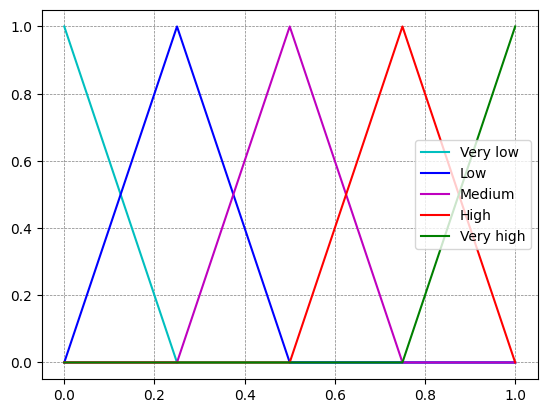

In [ ]:
# similarity 
x_similarity = np.arange(0, 1.05, 0.05)
similarity_vl = fuzz.trimf(x_similarity, [0, 0, 0.25])
similarity_lo = fuzz.trimf(x_similarity, [0, 0.25, 0.5])
similarity_me = fuzz.trimf(x_similarity, [0.25, 0.5, 0.75])
similarity_hi = fuzz.trimf(x_similarity, [0.5, 0.75, 1])
similarity_vh = fuzz.trimf(x_similarity, [0.75, 1, 1])

plt.plot(x_similarity, similarity_vl, 'c', linewidth=1.5, label='Very low')
plt.plot(x_similarity, similarity_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_similarity, similarity_me, 'm', linewidth=1.5, label='Medium')
plt.plot(x_similarity, similarity_hi, 'r', linewidth=1.5, label='High')
plt.plot(x_similarity, similarity_vh, 'g', linewidth=1.5, label='Very high')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.legend(loc= 'center right')

plt.show()

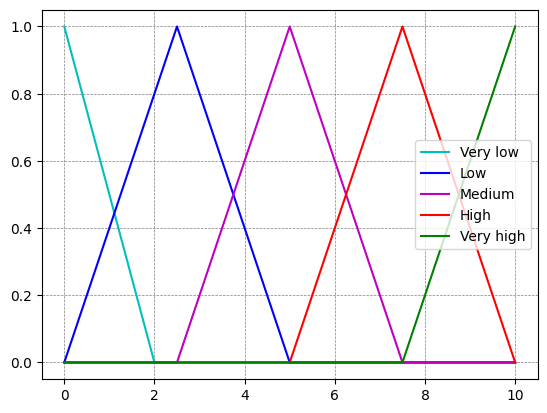

In [ ]:
# rating 
x_rating = np.arange(0, 10.05, 0.05)
rating_vl = fuzz.trimf(x_rating, [0, 0, 2])
rating_lo = fuzz.trimf(x_rating, [0, 2.5, 5])
rating_me = fuzz.trimf(x_rating, [2.5, 5, 7.5])
rating_hi = fuzz.trimf(x_rating, [5, 7.5, 10])
rating_vh = fuzz.trimf(x_rating, [7.5, 10, 10])

plt.plot(x_rating, rating_vl, 'c', linewidth=1.5, label='Very low')
plt.plot(x_rating, rating_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_rating, rating_me, 'm', linewidth=1.5, label='Medium')
plt.plot(x_rating, rating_hi, 'r', linewidth=1.5, label='High')
plt.plot(x_rating, rating_vh, 'g', linewidth=1.5, label='Very high')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.legend(loc= 'center right')

plt.show()

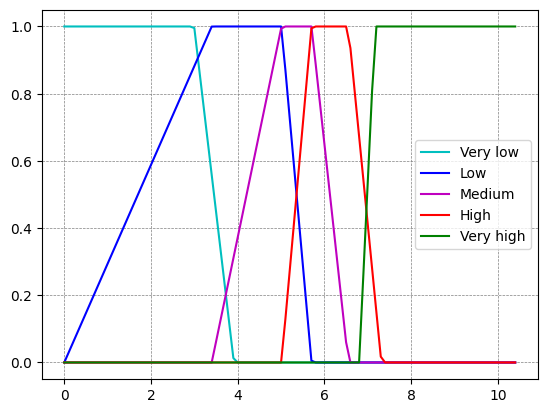

In [ ]:
# num of ratings
x_rating_num = np.arange(0, np.log(35010), 0.1)
rating_num_vl = fuzz.trapmf(x_rating_num, [0, 0, np.log(20), np.log(50)])
rating_num_lo = fuzz.trapmf(x_rating_num, [0, np.log(30), np.log(150), np.log(300)])
rating_num_me = fuzz.trapmf(x_rating_num, [np.log(30), np.log(150), np.log(300), np.log(700)])
rating_num_hi = fuzz.trapmf(x_rating_num, [np.log(150), np.log(300), np.log(700), np.log(1500)])
rating_num_vh = fuzz.trapmf(x_rating_num, [np.log(900), np.log(1300), np.log(35000), np.log(35000)])

plt.plot(x_rating_num, rating_num_vl, 'c', label='Very low')
plt.plot(x_rating_num, rating_num_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_rating_num, rating_num_me, 'm', linewidth=1.5, label='Medium')
plt.plot(x_rating_num, rating_num_hi, 'r', linewidth=1.5, label='High')
plt.plot(x_rating_num, rating_num_vh, 'g', linewidth=1.5, label='Very high')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.legend(loc= 'center right')

plt.show()

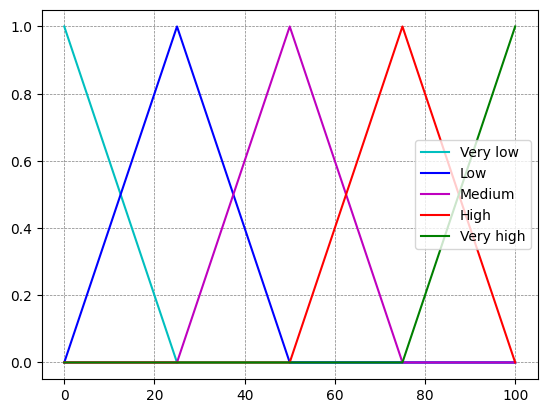

In [ ]:
# importance 
x_importance = np.arange(0, 101, 1)
importance_vl = fuzz.trimf(x_importance, [0, 0, 25])
importance_lo = fuzz.trimf(x_importance, [0, 25, 50])
importance_me = fuzz.trimf(x_importance, [25, 50, 75])
importance_hi = fuzz.trimf(x_importance, [50, 75, 100])
importance_vh = fuzz.trimf(x_importance, [75, 100, 100])

plt.plot(x_importance, importance_vl, 'c', linewidth=1.5, label='Very low')
plt.plot(x_importance, importance_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_importance, importance_me, 'm', linewidth=1.5, label='Medium')
plt.plot(x_importance, importance_hi, 'r', linewidth=1.5, label='High')
plt.plot(x_importance, importance_vh, 'g', linewidth=1.5, label='Very high')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.legend(loc= 'center right')

plt.show()

In [ ]:
#implementation with new version of pagace 

from skfuzzy import control as ctrl

# Definisanje ulaznih i izlazne varijable
rating = ctrl.Antecedent(np.arange(0, 10.05, 0.05), 'rating')
rating_num = ctrl.Antecedent(np.arange(0, np.log(35010), 0.1), 'num_of_ratings')
similarity = ctrl.Antecedent(np.arange(0, 1.05, 0.05), 'similarity')
importance = ctrl.Consequent(np.arange(0, 101, 1), 'importance')

# Povezivanje funkcija pripadnosti sa ulaznim i izlaznim varijablama

# rating 
rating['very_low'] = rating_vl
rating['low'] = rating_lo
rating['medium'] = rating_me
rating['high'] = rating_hi
rating['very_high'] = rating_vh

# num of ratings
rating_num['very_low'] = rating_num_vl
rating_num['low'] = rating_num_lo
rating_num['medium'] = rating_num_me
rating_num['high'] = rating_num_hi
rating_num['very_high'] = rating_num_vh

#similarity
similarity['very_low'] = similarity_vl
similarity['low'] = similarity_lo
similarity['medium'] = similarity_me
similarity['high'] = similarity_hi
similarity['very_high'] = similarity_vh

# importance 
importance['very_low'] = importance_vl
importance['low'] = importance_lo
importance['medium'] = importance_me
importance['high'] = importance_hi
importance['very_high'] = importance_vh


In [ ]:
# rules
rules = []
rules.append(ctrl.Rule(rating['very_low'] & rating_num['very_low'] & similarity['very_low'], importance['very_low']))
rules.append(ctrl.Rule(rating['low'] & rating_num['low'] & similarity['low'], importance['low']))
rules.append(ctrl.Rule(rating['medium'] & rating_num['medium'] & similarity['medium'], importance['medium']))
rules.append(ctrl.Rule(rating['very_low'] | rating_num['very_low'] | similarity['very_low'], importance['very_low']))
rules.append(ctrl.Rule(rating['low'] & rating_num['low'] & similarity['very_low'], importance['low']))
rules.append(ctrl.Rule(rating['low'] & rating_num['low'] & similarity['medium'], importance['medium']))
rules.append(ctrl.Rule(rating['low'] & rating_num['medium'] & similarity['very_high'], importance['medium']))
rules.append(ctrl.Rule(rating['medium'] & rating_num['low'] & similarity['very_high'], importance['medium']))
rules.append(ctrl.Rule(rating['medium'] & rating_num['high'] & similarity['very_high'], importance['high']))
rules.append(ctrl.Rule(rating['high'] & rating_num['high'] & similarity['very_high'], importance['high']))
rules.append(ctrl.Rule(rating['high'] & rating_num['very_high'] & similarity['very_high'], importance['very_high']))
rules.append(ctrl.Rule(rating['high'] & rating_num['very_high'] & similarity['high'], importance['high']))
rules.append(ctrl.Rule(rating['very_high'] | rating_num['very_high'] | similarity['very_high'], importance['very_high']))

rules.append(ctrl.Rule(rating['low'] & rating_num['low'] & similarity['low'], importance['very_low']))
rules.append(ctrl.Rule(rating['low'] & rating_num['low'] & similarity['very_high'], importance['low']))
rules.append(ctrl.Rule(rating['medium'] & rating_num['medium'] & similarity['very_high'], importance['medium']))
rules.append(ctrl.Rule(rating['medium'] & rating_num['high'] & similarity['very_high'], importance['medium']))
rules.append(ctrl.Rule(rating['high'] & rating_num['high'] & similarity['very_high'], importance['high']))
rules.append(ctrl.Rule(rating['high'] & rating_num['very_high'] & similarity['very_high'], importance['very_high']))
rules.append(ctrl.Rule(rating['medium'] & rating_num['very_high'] & similarity['very_high'], importance['high']))


In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
imp_ctrl = fuzz.control.ControlSystem(rules)
imp = fuzz.control.ControlSystemSimulation(imp_ctrl)

In [ ]:
recommendation_df = pd.read_csv(RECOMMENDATION_CSV_PATH, index_col=0)
anime_df = pd.read_csv(ANIME_CSV_PATH, index_col=0)[['MAL_ID','Score']]
rating_df = pd.read_csv(RATING_CSV_PATH)

In [ ]:
total_votes_df = rating_df.groupby('anime_id')['rating'].count()

In [ ]:
merged_df = recommendation_df.merge(total_votes_df, left_on='MAL_ID', right_on='anime_id').rename(columns={"rating": "total_votes"})
final_df = merged_df.merge(anime_df,on='MAL_ID')

In [ ]:
final_df

,MAL_ID,Name,Estimation,Similarity,total_votes,Score
0,820,Ginga Eiyuu Densetsu,9.594884,0.694365,903,9.07
1,199,Sen to Chihiro no Kamikakushi,9.517046,1.000000,22974,8.83
2,918,Gintama,9.444418,0.614572,4974,8.96
3,6594,Katanagatari,9.254977,1.000000,5317,8.36
4,431,Howl no Ugoku Shiro,9.215057,1.000000,17258,8.67
5,11979,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,9.085566,1.000000,3014,8.39
6,263,Hajime no Ippo,9.032332,0.841716,4935,8.75
7,164,Mononoke Hime,9.021596,1.000000,16303,8.72
8,1453,Maison Ikkoku,8.996126,0.505286,438,8.18
9,232,Cardcaptor Sakura,8.981206,1.000000,7492,8.16


In [ ]:
final_df['EXS IMPORTANCE'] = 0

In [ ]:
def calculate_importance(x):
  temp_score = float(x['Score'])
  temp_rating_num = np.log(x['total_votes'])
  temp_similarity = x['Similarity']
  imp.input['rating'] =  temp_score
  imp.input['num_of_ratings'] = temp_rating_num
  imp.input['similarity'] = temp_similarity
  imp.compute()
  return imp.output['importance']

In [ ]:
final_df['EXS IMPORTANCE'] = final_df.apply(lambda x: calculate_importance(x), axis=1)

In [ ]:
def calculate_final_evaluation(x):
  est = x['Estimation'] / 10
  impo = x['EXS IMPORTANCE'] / 100
  if x['Estimation'] <= 0:
    return est * impo
  return est * (1+impo)

In [ ]:
final_df['Final evaluation'] = final_df.apply(lambda x: calculate_final_evaluation(x), axis=1)
final_df = final_df.sort_values(by=['Final evaluation'], ascending=False)
final_df.reset_index()
final_df

,MAL_ID,Name,Estimation,Similarity,total_votes,Score,EXS IMPORTANCE,Final evaluation
1,199,Sen to Chihiro no Kamikakushi,9.517046,1.000000,22974,8.83,91.666667,1.824100
0,820,Ginga Eiyuu Densetsu,9.594884,0.694365,903,9.07,89.861817,1.821702
3,6594,Katanagatari,9.254977,1.000000,5317,8.36,91.666667,1.773871
4,431,Howl no Ugoku Shiro,9.215057,1.000000,17258,8.67,91.666667,1.766219
5,11979,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,9.085566,1.000000,3014,8.39,91.666667,1.741400
7,164,Mononoke Hime,9.021596,1.000000,16303,8.72,91.666667,1.729139
9,232,Cardcaptor Sakura,8.981206,1.000000,7492,8.16,91.666667,1.721398
10,486,Kino no Tabi: The Beautiful World,8.914218,1.000000,2550,8.34,91.666667,1.708558
2,918,Gintama,9.444418,0.614572,4974,8.96,80.783223,1.707392
11,2418,Stranger: Mukou Hadan,8.887235,1.000000,5115,8.31,91.666667,1.703387
